In [8]:
#Import Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import f
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
import math
import seaborn as sns
import matplotlib.pyplot as plt 


Q1. Tom is working in a credit card processing company as a team leader. His team is responsible to validate certain data for new credit card applications. The time spent by his team on an application is normally distributed with average 300 minutes and standard deviation 40 minutes.Tom and his team worked on process improvement to reduce the time spent in processing new applications. After implementing the improvements, Tom checked the time spent by his team on randomly selected 25 new card applications. The average time spent is 290 min. Tom is happy that, though it is a small improvement, it is a step in right direction. He shares the good news with his manager Lisa. But Lisa in not convinced about the improvement. At 95% confidence, is the processes really improved?

In [10]:
N = 25   
x_bar = 290
mu = 300
sigma = 40
z = (290 - 300)*np.sqrt(25)/sigma
z

-1.25

In [12]:
cv = stats.norm.ppf(0.05, 0,1)
cv

-1.6448536269514729

In [15]:
p_val = stats.norm.sf(abs(z))
p_val

0.10564977366685535

In [ ]:
#There is no improvement in the process. 

# Question 2

Q2.The Titan Insurance Company has just installed a new incentive payment scheme for its life policy sales-force. It wants to have an early view of the success or failure of the new scheme. Indications are that the sales force is selling more policies but sales always vary in an unpredictable pattern from month to month and it is not clear that the scheme has made a significant difference. Life Insurance companies typically measure the monthly output of a salesperson as the total sum assured for the policies sold by that person during the month.

Titan's new scheme is that the sales force receive low regular salaries but are paid large bonuses related to their output (i.e. to the total sum assured of policies sold by them). The scheme is expensive for the company but they are looking for sales increases to compensate for it. The scheme has now been in operation for four months. It has settled down after fluctuations in the first two months due to the changeover.

To test the effectiveness of the scheme, Titan has taken a random sample of 30 salespeople measured their output in the penultimate month prior to changeover and then measured it in the fourth month after the changeover (they have deliberately chosen months not too close to the changeover).

# Importing CSV 

In [16]:
df = pd.read_csv("Titan Case Study-1.csv")

# Checking the top 5 rows

In [17]:
df.head()

,Salesperson,Old Scheme,New Scheme
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


# Checking Summary of data

In [18]:
df.describe()

,Salesperson,Old Scheme,New Scheme
count,30.000000,30.000000,30.000000
mean,15.500000,68.033333,72.033333
std,8.803408,20.455980,24.062395
min,1.000000,28.000000,32.000000
25%,8.250000,54.000000,55.000000
50%,15.500000,67.000000,74.000000
75%,22.750000,81.500000,85.750000
max,30.000000,110.000000,122.000000


# Check for missing values

In [19]:
df.isnull().sum()

Salesperson    0
Old Scheme     0
New Scheme     0
dtype: int64

# Plot Histograms and boxplot

array([[<AxesSubplot:title={'center':'Old Scheme'}>,
        <AxesSubplot:title={'center':'New Scheme'}>]], dtype=object)

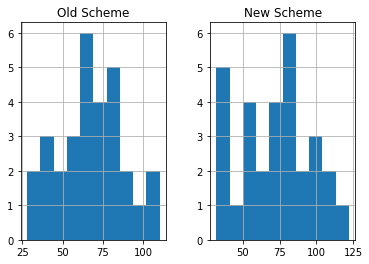

In [20]:
df.iloc[:, 1:3].hist()

<AxesSubplot:>

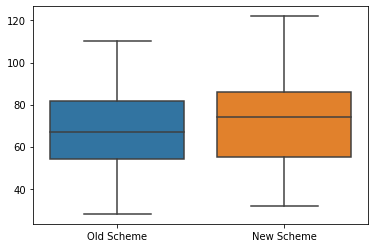

In [21]:
sns.boxplot(data = df[["Old Scheme", "New Scheme"]])

# Describe the five per cent significance test you would apply to these data to determine whether new scheme has significantly raised outputs?

- The level of significance (Alpha ) = 0.05.

- But since the population standard deviation (Sigma) is unknown, we have to use a Tstat test.

- Degree of Freedom: Since the sample is the same for both Sampling tests, we have N-1 degrees of freedom : 29

- Since the sole purpose of the test is to check whether the New scheme is successful compared to old scheme, we would prefer a One-sided T-test.

In [22]:
#h0 : new scheme did not raise any output significantly(mu_old - mu_new >=0)
#h1 : new scheme increased the output(mu_old - mu_new < 0)
t , p_value = stats.ttest_rel(df["Old Scheme"], df["New Scheme"])
p_value

0.13057553961337662

# What conclusion does the test lead to?

In [23]:
p_value/2

0.06528776980668831

In [26]:
t, p_value = stats.ttest_1samp(a = df["New Scheme"], popmean=df["Old Scheme"].mean())
p_value

0.3700631246287157

In [ ]:
#Accept null hypothesis, New Schemes did not increase output

# What reservations have you about this result?

# Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000. If this figure is alternative hypothesis, what is:

- The probability of a type 1 error?
- The probability of a type 2 error?
- The power of the test?

In [ ]:
#type 1 error = prob of rejecting the null hypothesis when it is true
#type 2 error = prob of accepting the null hypo when it is false
#h0 = old - new = 0
#h1 = new - old = 5000


## Finding Sample Standard Deviation for paired t-test

In [27]:
df["diff"] = df["Old Scheme"] - df["New Scheme"]

In [32]:
df["diff"].std()

14.08104619937615

In [33]:
values = abs(stats.t.ppf(0.05,29))
values

1.6991270265334977

In [34]:
d_bar = 1.699*(14.08/np.sqrt(30))
d_bar

4.367525067611328

In [36]:
tstat = (4.37 - 5)/(14.08/np.sqrt(30))
tstat

-0.24507472388370358

In [37]:
p = stats.t.cdf(-0.24, 29)
p

0.406009323378882

# Probability of Type II Error ($\beta$)

In [38]:
p = stats.t.cdf(-0.24, 29)
p

0.406009323378882

# Power of the Test:
    
Power of the hypothesis test is 1 minus the probability of Type II error.
Basically the power of a test is the probability that we make the right decision when the null is not correct (i.e. we correctly reject it)

In [39]:
1 - p 

0.593990676621118

# Extra Question

# What sample size would make the probabilities of type 1 and type 2 errors equal?

# Appendix

## Procedure for carrying out a paired t-test
    Suppose a sample of n students were given a diagnostic test before studying a particular
    module and then again after completing the module. We want to find out if, in general,
    our teaching leads to improvements in students’ knowledge/skills (i.e. test scores). We
    can use the results from our sample of students to draw conclusions about the impact of
    this module in general
    
   Let x = test score before the module, y = test score after the module
   To test the null hypothesis that the true mean difference is zero, the procedure is as
   follows:
    1. Calculate the difference (di = yi − xi) between the two observations on each pair,
    making sure you distinguish between positive and negative differences.
    2. Calculate the mean difference, d.
    3. Calculate the standard deviation of the differences, sd, and use this to calculate the
    standard error of the mean difference, SE(d) = sd/√n
    4. Calculate the t-statistic, which is given by T =d/SE(d), Under the null hypothesis, this statistic follows a t-distribution with n − 1 degrees of freedom.
    5. Use tables of the t-distribution to compare your value for T to the tn-1 distribution.
    This will give the p-value for the paired t-test.